# 项目公式推导
> updated: 2023-07-13

In [2]:
# 导入库
import sympy as sp

## 误差矩阵的推导

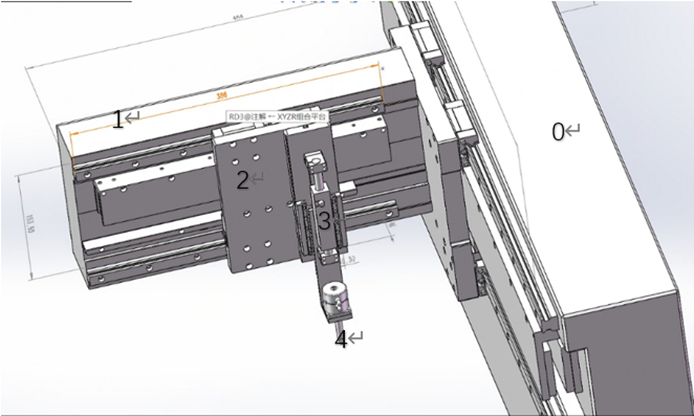

四轴机床的前三个坐标系采用平行假设（实际DH表示方法需要变换坐标系）

In [3]:
# 代求量——齐次变换矩阵
T_1__0 = sp.symbols("T_1^0")
T_2__1 = sp.symbols("T_2^1")
T_3__2 = sp.symbols("T_3^2")
T_4__3 = sp.symbols("T_4^3")

In [5]:
# 拖板误差量——平移和旋转
e_x1, e_y1, e_z1 = sp.symbols("\epsilon_x1 \epsilon_y1 \epsilon_z1")
e_x2, e_y2, e_z2 = sp.symbols("\epsilon_x2 \epsilon_y2 \epsilon_z2")
e_x3, e_y3, e_z3 = sp.symbols("\epsilon_x3 \epsilon_y3 \epsilon_z3")
e_x4, e_y4, e_z4 = sp.symbols("\epsilon_x4 \epsilon_y4 \epsilon_z4")

d_x1, d_y1, d_z1 = sp.symbols("\delta_x1 \delta_y1 \delta_z1")
d_x2, d_y2, d_z2 = sp.symbols("\delta_x2 \delta_y2 \delta_z2")
d_x3, d_y3, d_z3 = sp.symbols("\delta_x3 \delta_y3 \delta_z3")
d_x4, d_y4, d_z4 = sp.symbols("\delta_x4 \delta_y4 \delta_z4")

a1, b1, c1 = sp.symbols("a1 b1 c1")   # 位移量，应该是DH参数给出的
a2, b2, c2 = sp.symbols("a2 b2 c2")
a3, b3, c3 = sp.symbols("a3 b3 c3")

t_x, t_y, t_z = sp.symbols("theta_x theta_y theta_z")


In [8]:
# 齐次变换矩阵
T_1__0 = sp.Matrix([
    [1, -e_z1, e_y1, a1+d_x1],
    [e_z1, 1, -e_x1, b1+d_y1],
    [-e_y1, e_x1, 1, c1+d_z1],
    [0, 0, 0, 1]
])
T_2__1 = sp.Matrix([
    [1, -e_z2, e_y2, a2+d_x2],
    [e_z2, 1, -e_x2, b2+d_y2],
    [-e_y2, e_x2, 1, c2+d_z2],
    [0, 0, 0, 1]
])
T_3__2 = sp.Matrix([
    [1, -e_z3, e_y3, a3+d_x3],
    [e_z3, 1, -e_x3, b3+d_y3],
    [-e_y3, e_x3, 1, c3+d_z3],
    [0, 0, 0, 1]
])
T_4__3 = sp.Matrix([
    [sp.cos(t_z), -sp.sin(t_z), e_y4, d_x4],
    [sp.sin(t_z), sp.cos(t_z), -e_x4, d_y4],
    [e_x4*sp.sin(t_z)-e_y4*sp.cos(t_z), e_x4*sp.cos(t_z)+e_y4*sp.sin(t_z), 1, d_z4],
    [0, 0, 0, 1]
])
T_4__3

Matrix([
[                                       cos(theta_z),                                       -sin(theta_z),  \epsilon_y4, \delta_x4],
[                                       sin(theta_z),                                        cos(theta_z), -\epsilon_x4, \delta_y4],
[\epsilon_x4*sin(theta_z) - \epsilon_y4*cos(theta_z), \epsilon_x4*cos(theta_z) + \epsilon_y4*sin(theta_z),            1, \delta_z4],
[                                                  0,                                                   0,            0,         1]])

In [9]:
# 总体齐次变换矩阵
T_4__0 = T_1__0 * T_2__1 * T_3__2 * T_4__3
T_4__0 = T_4__0.expand()
T_4__0

Matrix([
[-\epsilon_x2*\epsilon_x3*\epsilon_x4*\epsilon_y1*sin(theta_z) + \epsilon_x2*\epsilon_x3*\epsilon_y1*\epsilon_y4*cos(theta_z) + \epsilon_x2*\epsilon_x3*\epsilon_z1*sin(theta_z) + \epsilon_x2*\epsilon_x4*\epsilon_z1*sin(theta_z) + \epsilon_x2*\epsilon_y1*\epsilon_z3*cos(theta_z) + \epsilon_x2*\epsilon_y1*sin(theta_z) - \epsilon_x2*\epsilon_y3*\epsilon_z1*cos(theta_z) - \epsilon_x2*\epsilon_y4*\epsilon_z1*cos(theta_z) + \epsilon_x3*\epsilon_x4*\epsilon_z1*sin(theta_z) + \epsilon_x3*\epsilon_x4*\epsilon_z2*sin(theta_z) + \epsilon_x3*\epsilon_y1*sin(theta_z) + \epsilon_x3*\epsilon_y2*sin(theta_z) - \epsilon_x3*\epsilon_y4*\epsilon_z1*cos(theta_z) - \epsilon_x3*\epsilon_y4*\epsilon_z2*cos(theta_z) - \epsilon_x4*\epsilon_y1*\epsilon_y2*\epsilon_y3*sin(theta_z) + \epsilon_x4*\epsilon_y1*sin(theta_z) + \epsilon_x4*\epsilon_y2*sin(theta_z) - \epsilon_x4*\epsilon_y3*\epsilon_z1*\epsilon_z2*sin(theta_z) + \epsilon_x4*\epsilon_y3*sin(theta_z) + \epsilon_y1*\epsilon_y2*\epsilon_y3*\epsilon

In [10]:
# 忽略所有高阶小量
high_group = []
ex_list = [e_x1, e_x2, e_x3, e_x4]
ey_list = [e_y1, e_y2, e_y3, e_y4]
ez_list = [e_z1, e_z2, e_z3, e_z4]
d_list = [d_x1, d_x2, d_x3, d_x4, d_y1, d_y2, d_y3, d_y4, d_z1, d_z2, d_z3, d_z4]
ed_list = ex_list + ey_list + ez_list + d_list
for i in range(len(ed_list)):
    for j in range(len(ed_list)):
        high_group.append((ed_list[i]*ed_list[j], 0))
T_4__0 = T_4__0.subs(high_group).expand()
T_4__0

Matrix([
[                                                                                                                       -\epsilon_z1*sin(theta_z) - \epsilon_z2*sin(theta_z) - \epsilon_z3*sin(theta_z) + cos(theta_z),                                                                                                                        -\epsilon_z1*cos(theta_z) - \epsilon_z2*cos(theta_z) - \epsilon_z3*cos(theta_z) - sin(theta_z),  \epsilon_y1 + \epsilon_y2 + \epsilon_y3 + \epsilon_y4, \delta_x1 + \delta_x2 + \delta_x3 + \delta_x4 + \epsilon_y1*c2 + \epsilon_y1*c3 + \epsilon_y2*c3 - \epsilon_z1*b2 - \epsilon_z1*b3 - \epsilon_z2*b3 + a1 + a2 + a3],
[                                                                                                                        \epsilon_z1*cos(theta_z) + \epsilon_z2*cos(theta_z) + \epsilon_z3*cos(theta_z) + sin(theta_z),                                                                                                                        -\ep

- 误差计算

In [11]:
p_x, p_y, p_z = sp.symbols("p_x p_y p_z")
P_inp = sp.Matrix([p_x, p_y, p_z, 1])
P_inp   # 输入值

Matrix([
[p_x],
[p_y],
[p_z],
[  1]])

In [12]:
P_exp = P_inp.copy()
P_list = [a1, b1, c1, a2, b2, c2, a3, b3, c3]
for i in range(3):
    P_exp[i] += (P_list[i] + P_list[i+3] + P_list[i+6])
P_exp   # 目标位置

Matrix([
[a1 + a2 + a3 + p_x],
[b1 + b2 + b3 + p_y],
[c1 + c2 + c3 + p_z],
[                 1]])

In [13]:
P_real = T_4__0 * P_inp
P_real   # 实际位置

Matrix([
[                                                                                                                                                                                      \delta_x1 + \delta_x2 + \delta_x3 + \delta_x4 + \epsilon_y1*c2 + \epsilon_y1*c3 + \epsilon_y2*c3 - \epsilon_z1*b2 - \epsilon_z1*b3 - \epsilon_z2*b3 + a1 + a2 + a3 + p_x*(-\epsilon_z1*sin(theta_z) - \epsilon_z2*sin(theta_z) - \epsilon_z3*sin(theta_z) + cos(theta_z)) + p_y*(-\epsilon_z1*cos(theta_z) - \epsilon_z2*cos(theta_z) - \epsilon_z3*cos(theta_z) - sin(theta_z)) + p_z*(\epsilon_y1 + \epsilon_y2 + \epsilon_y3 + \epsilon_y4)],
[                                                                                                                                                                                      \delta_y1 + \delta_y2 + \delta_y3 + \delta_y4 - \epsilon_x1*c2 - \epsilon_x1*c3 - \epsilon_x2*c3 + \epsilon_z1*a2 + \epsilon_z1*a3 + \epsilon_z2*a3 + b1 + b2 + b3 + p_x*(\epsilon_z1*cos(theta_

In [15]:
# 计算误差
P_err = P_real - P_exp
P_err.simplify()
for i in range(3):
    P_err[i] = P_err[i].collect([p_x, p_y, p_z])

In [16]:
P_err[0]

\delta_x1 + \delta_x2 + \delta_x3 + \delta_x4 + \epsilon_y1*c2 + \epsilon_y1*c3 + \epsilon_y2*c3 - \epsilon_z1*b2 - \epsilon_z1*b3 - \epsilon_z2*b3 + p_x*(-\epsilon_z1*sin(theta_z) - \epsilon_z2*sin(theta_z) - \epsilon_z3*sin(theta_z) + cos(theta_z) - 1) + p_y*(-\epsilon_z1*cos(theta_z) - \epsilon_z2*cos(theta_z) - \epsilon_z3*cos(theta_z) - sin(theta_z)) + p_z*(\epsilon_y1 + \epsilon_y2 + \epsilon_y3 + \epsilon_y4)

In [17]:
P_err[1]

\delta_y1 + \delta_y2 + \delta_y3 + \delta_y4 - \epsilon_x1*c2 - \epsilon_x1*c3 - \epsilon_x2*c3 + \epsilon_z1*a2 + \epsilon_z1*a3 + \epsilon_z2*a3 + p_x*(\epsilon_z1*cos(theta_z) + \epsilon_z2*cos(theta_z) + \epsilon_z3*cos(theta_z) + sin(theta_z)) + p_y*(-\epsilon_z1*sin(theta_z) - \epsilon_z2*sin(theta_z) - \epsilon_z3*sin(theta_z) + cos(theta_z) - 1) + p_z*(-\epsilon_x1 - \epsilon_x2 - \epsilon_x3 - \epsilon_x4)

In [18]:
P_err[2]

\delta_z1 + \delta_z2 + \delta_z3 + \delta_z4 + \epsilon_x1*b2 + \epsilon_x1*b3 + \epsilon_x2*b3 - \epsilon_y1*a2 - \epsilon_y1*a3 - \epsilon_y2*a3 + p_x*(\epsilon_x1*sin(theta_z) + \epsilon_x2*sin(theta_z) + \epsilon_x3*sin(theta_z) + \epsilon_x4*sin(theta_z) - \epsilon_y1*cos(theta_z) - \epsilon_y2*cos(theta_z) - \epsilon_y3*cos(theta_z) - \epsilon_y4*cos(theta_z)) + p_y*(\epsilon_x1*cos(theta_z) + \epsilon_x2*cos(theta_z) + \epsilon_x3*cos(theta_z) + \epsilon_x4*cos(theta_z) + \epsilon_y1*sin(theta_z) + \epsilon_y2*sin(theta_z) + \epsilon_y3*sin(theta_z) + \epsilon_y4*sin(theta_z))

和之前学长们写的结果不一致？？应该是学长的错了吧，前面不是六项

整理，并生成$\LaTeX$

In [19]:
for i in range(3):
    print(sp.latex(P_err[i]))
print(sp.latex(P_real))

\delta_{x1} + \delta_{x2} + \delta_{x3} + \delta_{x4} + \epsilon_{y1} c_{2} + \epsilon_{y1} c_{3} + \epsilon_{y2} c_{3} - \epsilon_{z1} b_{2} - \epsilon_{z1} b_{3} - \epsilon_{z2} b_{3} + p_{x} \left(- \epsilon_{z1} \sin{\left(\theta_{z} \right)} - \epsilon_{z2} \sin{\left(\theta_{z} \right)} - \epsilon_{z3} \sin{\left(\theta_{z} \right)} + \cos{\left(\theta_{z} \right)} - 1\right) + p_{y} \left(- \epsilon_{z1} \cos{\left(\theta_{z} \right)} - \epsilon_{z2} \cos{\left(\theta_{z} \right)} - \epsilon_{z3} \cos{\left(\theta_{z} \right)} - \sin{\left(\theta_{z} \right)}\right) + p_{z} \left(\epsilon_{y1} + \epsilon_{y2} + \epsilon_{y3} + \epsilon_{y4}\right)
\delta_{y1} + \delta_{y2} + \delta_{y3} + \delta_{y4} - \epsilon_{x1} c_{2} - \epsilon_{x1} c_{3} - \epsilon_{x2} c_{3} + \epsilon_{z1} a_{2} + \epsilon_{z1} a_{3} + \epsilon_{z2} a_{3} + p_{x} \left(\epsilon_{z1} \cos{\left(\theta_{z} \right)} + \epsilon_{z2} \cos{\left(\theta_{z} \right)} + \epsilon_{z3} \cos{\left(\theta_{z} \right)

In [20]:
T_list = [T_1__0, T_2__1, T_3__2, T_4__3]
for T in T_list:
    print(sp.latex(T))

\left[\begin{matrix}1 & - \epsilon_{z1} & \epsilon_{y1} & \delta_{x1} + a_{1}\\\epsilon_{z1} & 1 & - \epsilon_{x1} & \delta_{y1} + b_{1}\\- \epsilon_{y1} & \epsilon_{x1} & 1 & \delta_{z1} + c_{1}\\0 & 0 & 0 & 1\end{matrix}\right]
\left[\begin{matrix}1 & - \epsilon_{z2} & \epsilon_{y2} & \delta_{x2} + a_{2}\\\epsilon_{z2} & 1 & - \epsilon_{x2} & \delta_{y2} + b_{2}\\- \epsilon_{y2} & \epsilon_{x2} & 1 & \delta_{z2} + c_{2}\\0 & 0 & 0 & 1\end{matrix}\right]
\left[\begin{matrix}1 & - \epsilon_{z3} & \epsilon_{y3} & \delta_{x3} + a_{3}\\\epsilon_{z3} & 1 & - \epsilon_{x3} & \delta_{y3} + b_{3}\\- \epsilon_{y3} & \epsilon_{x3} & 1 & \delta_{z3} + c_{3}\\0 & 0 & 0 & 1\end{matrix}\right]
\left[\begin{matrix}\cos{\left(\theta_{z} \right)} & - \sin{\left(\theta_{z} \right)} & \epsilon_{y4} & \delta_{x4}\\\sin{\left(\theta_{z} \right)} & \cos{\left(\theta_{z} \right)} & - \epsilon_{x4} & \delta_{y4}\\\epsilon_{x4} \sin{\left(\theta_{z} \right)} - \epsilon_{y4} \cos{\left(\theta_{z} \right)} & \e

In [21]:
# 太大了，分开打印齐次矩阵的所有分量
for i in range(4):
    for j in range(4):
        print(f"T_4^0[{i+1}, {j+1}] = ", end=" ")
        print(sp.latex(T_4__0[i, j]), end = "")
        print("\\\\")
        

T_4^0[1, 1] =  - \epsilon_{z1} \sin{\left(\theta_{z} \right)} - \epsilon_{z2} \sin{\left(\theta_{z} \right)} - \epsilon_{z3} \sin{\left(\theta_{z} \right)} + \cos{\left(\theta_{z} \right)}\\
T_4^0[1, 2] =  - \epsilon_{z1} \cos{\left(\theta_{z} \right)} - \epsilon_{z2} \cos{\left(\theta_{z} \right)} - \epsilon_{z3} \cos{\left(\theta_{z} \right)} - \sin{\left(\theta_{z} \right)}\\
T_4^0[1, 3] =  \epsilon_{y1} + \epsilon_{y2} + \epsilon_{y3} + \epsilon_{y4}\\
T_4^0[1, 4] =  \delta_{x1} + \delta_{x2} + \delta_{x3} + \delta_{x4} + \epsilon_{y1} c_{2} + \epsilon_{y1} c_{3} + \epsilon_{y2} c_{3} - \epsilon_{z1} b_{2} - \epsilon_{z1} b_{3} - \epsilon_{z2} b_{3} + a_{1} + a_{2} + a_{3}\\
T_4^0[2, 1] =  \epsilon_{z1} \cos{\left(\theta_{z} \right)} + \epsilon_{z2} \cos{\left(\theta_{z} \right)} + \epsilon_{z3} \cos{\left(\theta_{z} \right)} + \sin{\left(\theta_{z} \right)}\\
T_4^0[2, 2] =  - \epsilon_{z1} \sin{\left(\theta_{z} \right)} - \epsilon_{z2} \sin{\left(\theta_{z} \right)} - \epsilon_{z3

In [22]:
# 实际位置
symbolList = ["x", "y", "z"]
for i in range(3):
    print("P_{real_" + f"{symbolList[i]}" + "} = ", end="")
    print(sp.latex(P_real[i]), end = "")
    print("\\\\")
print(sp.latex(P_exp))

P_{real_x} = \delta_{x1} + \delta_{x2} + \delta_{x3} + \delta_{x4} + \epsilon_{y1} c_{2} + \epsilon_{y1} c_{3} + \epsilon_{y2} c_{3} - \epsilon_{z1} b_{2} - \epsilon_{z1} b_{3} - \epsilon_{z2} b_{3} + a_{1} + a_{2} + a_{3} + p_{x} \left(- \epsilon_{z1} \sin{\left(\theta_{z} \right)} - \epsilon_{z2} \sin{\left(\theta_{z} \right)} - \epsilon_{z3} \sin{\left(\theta_{z} \right)} + \cos{\left(\theta_{z} \right)}\right) + p_{y} \left(- \epsilon_{z1} \cos{\left(\theta_{z} \right)} - \epsilon_{z2} \cos{\left(\theta_{z} \right)} - \epsilon_{z3} \cos{\left(\theta_{z} \right)} - \sin{\left(\theta_{z} \right)}\right) + p_{z} \left(\epsilon_{y1} + \epsilon_{y2} + \epsilon_{y3} + \epsilon_{y4}\right)\\
P_{real_y} = \delta_{y1} + \delta_{y2} + \delta_{y3} + \delta_{y4} - \epsilon_{x1} c_{2} - \epsilon_{x1} c_{3} - \epsilon_{x2} c_{3} + \epsilon_{z1} a_{2} + \epsilon_{z1} a_{3} + \epsilon_{z2} a_{3} + b_{1} + b_{2} + b_{3} + p_{x} \left(\epsilon_{z1} \cos{\left(\theta_{z} \right)} + \epsilon_{z2} \cos